<h1>Introdução</h1>
O objetivo que escolhemos foi o de climate action, ou de alterações climáticas mundiais. Esse objetivo possui extrema relevância de ser estudado, uma vez que caso esse não seja policiado, teremos diversos malefícios tanto para nós, seres humanos quanto para com todo o resto do ecossistema mundial (animais, climas, solos, entre outros). 

Alguns exemplos são: aumento de desastres naturais como secas, inundações, chuva ácida; nível do mar subindo; agravamento na saúde das pessoas (causando uma maior incidência de bronquite e asma); etc.

O indicador que escolhemos dentro da alteração climática mundial foi emissões de gás carbônico (toneladas métricas per capita). O gás carbônico é um gás de efeito estufa. Isso quer dizer que ele absorve o calor da atmosfera, e irradia-o para todas as direções. Como uma dessas direções inclui a terra, ele acaba esquentando a face da terra. Naturalmente, esse efeito é bom, porque é ele que previne um congelamento total da terra como vimos na era do gelo; porém, ao emitir quantidades excessivas de gás carbônico, estamos esquentando a terra, causando mudanças drásticas à temperatura.

Algo interessante para considerar é que as variações de temperatura causadas pelo efeito estufa não só aumentam a temperatura média, mas surpreendentemente podem deixar os invernos mais frios.  Esses invernos são causados pelos vórtices polares, vórtices que carregam ventos frios por volta dos polos. Ao esquentar a terra, os vórtices enfraquecem-se, resultando em vários vórtices pequenos que causam frentes frias pelo mundo. Isso pode ser perigoso como pode acabar causando crises de fome e falta de adaptação em países sem a infraestrutura necessária para se proteger do frio.

Para evitar o agravamento dos efeitos destrutivos dessas alterações climáticas, a ONU procura reduzir o nível de emissões carbônicas, que anda aumentando nos últimos anos. Porém, muitos países não mostram indicadores de parar com atividades poluentes que produzem CO2. Dentro dessas, incluem queimadas, industrialização, e combustão fóssil. Vale ressaltar que muitos países escondem essas atividades, a fim de sonegar taxação sobre carbono.

Portanto, a luta contra o aumento de emissões CO2 é indispensável. A partir dos dados supracitados e com consciência das possibilidades para o futuro, temos como dever controlar nossas próprias ações e suas consequências em relação ao resto do mundo, por isso devemos analisar e compreender os dados reunidos, referentes à quantidade emitida de CO2 no mundo por tonelada, e a partir desses, tomar decisões as quais nos permitam contornar e melhorar a situação que nos encontramos.

Escolhemos 3 países como amostra: 
<ul>
<li>Brasil;</li>
<li>País com métricas defasadas, em relação ao Brasil: China;</li>
<li>País avançado, também em acordo com o mesmo: Dinamarca.</li>
</ul>

Optamos por escolher a China por possuir um histórico de longa data no setor industrial, produção e manufatura, por isso esse acaba sendo um país com um altos índices de emissão de CO2. Além disso, selecionamos a Dinamarca por conta de sua tendência de queda na emissão de CO2, menor que a tendência do Brasil que manteve-se, praticamente, constante.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
path = 'data/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_4353266/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_4353266.csv'
df = pd.read_csv(path, skiprows=4, sep=',', decimal='.', encoding='latin1')

# Utilizar apenas os dados disponíveis (entre 1960 e 2019)
for i in range(1960, 1991):
    del df[str(i)]
df.drop(['2020', '2021', 'Unnamed: 66'], axis=1, inplace=True)

df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.953224,0.915661,0.916485,0.917093,0.936570,0.947393,...,1.021548,0.979352,0.992616,1.005027,1.016649,0.966589,0.948410,0.937926,0.917507,0.913618
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.167682,0.095958,0.084721,0.075546,0.068468,0.062588,...,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.530016,0.568305,0.523529,0.470888,0.501681,0.564390,...,0.472077,0.476789,0.480603,0.508099,0.515960,0.494065,0.499405,0.483140,0.486456,0.493923
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.544539,0.543557,0.708984,0.836804,0.912141,1.072168,...,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137


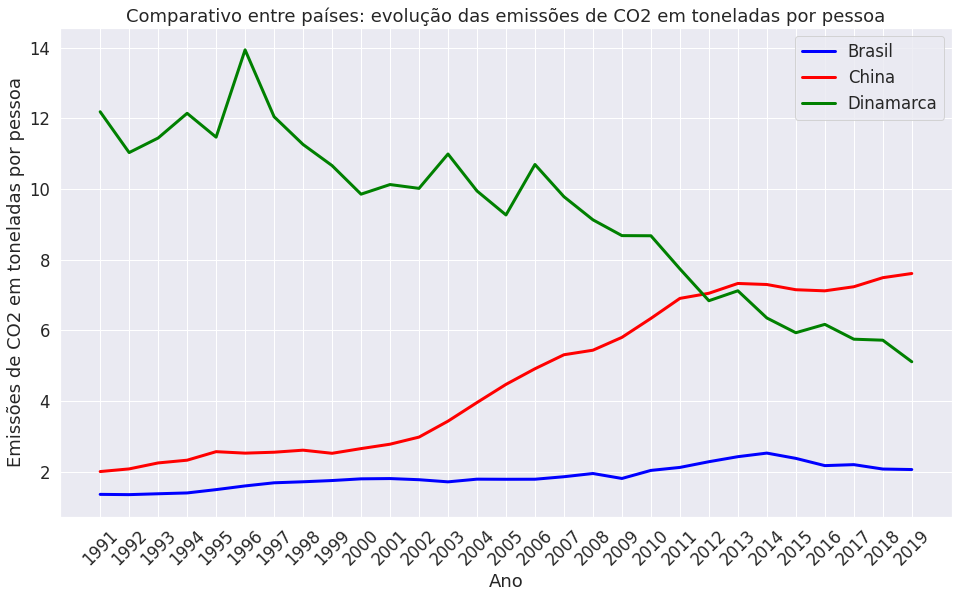

In [7]:
df_brasil = df[df['Country Name'] == 'Brazil']
df_china = df[df['Country Name'] == 'China']
df_dinamarca = df[df['Country Name'] == 'Denmark']

df_brasil = df_brasil.drop(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code'], axis=1)
df_china = df_china.drop(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code'], axis=1)
df_dinamarca = df_dinamarca.drop(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code'], axis=1)

df_brasil = df_brasil.transpose()
df_china = df_china.transpose()
df_dinamarca = df_dinamarca.transpose()

df_brasil.columns = ['Emissões de CO2 em toneladas por pessoa']
df_china.columns = ['Emissões de CO2 em toneladas por pessoa']
df_dinamarca.columns = ['Emissões de CO2 em toneladas por pessoa']

sns.set(rc={'figure.figsize':(16, 9)}, font_scale = 1.5, style='darkgrid')
sns.lineplot(data=df_brasil, linewidth=3, palette=['blue'], label='Brasil', legend=False)
sns.lineplot(data=df_china, linewidth=3, palette=['red'], label='China', legend=False)
sns.lineplot(data=df_dinamarca, linewidth=3, palette=['green'], label='Dinamarca', legend=False)
plt.title('Comparativo entre países: evolução das emissões de CO2 em toneladas por pessoa')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 em toneladas por pessoa')
plt.xticks(rotation=45)
plt.legend()
plt.show()


<h1>Gráficos Individuais</h1>

Para exemplificar a evolução individual e tais países, o grupo também elaborou gráficos lineares individuais.

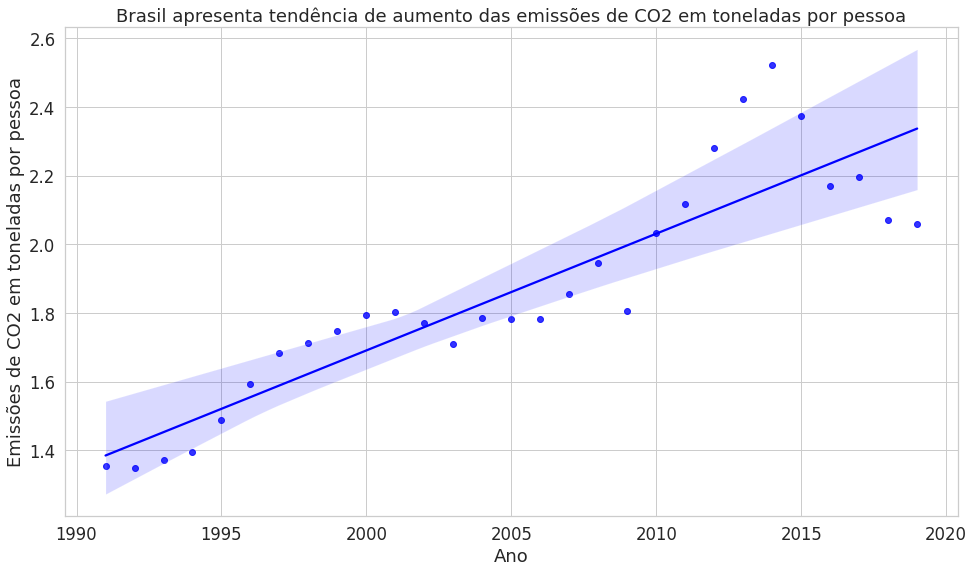

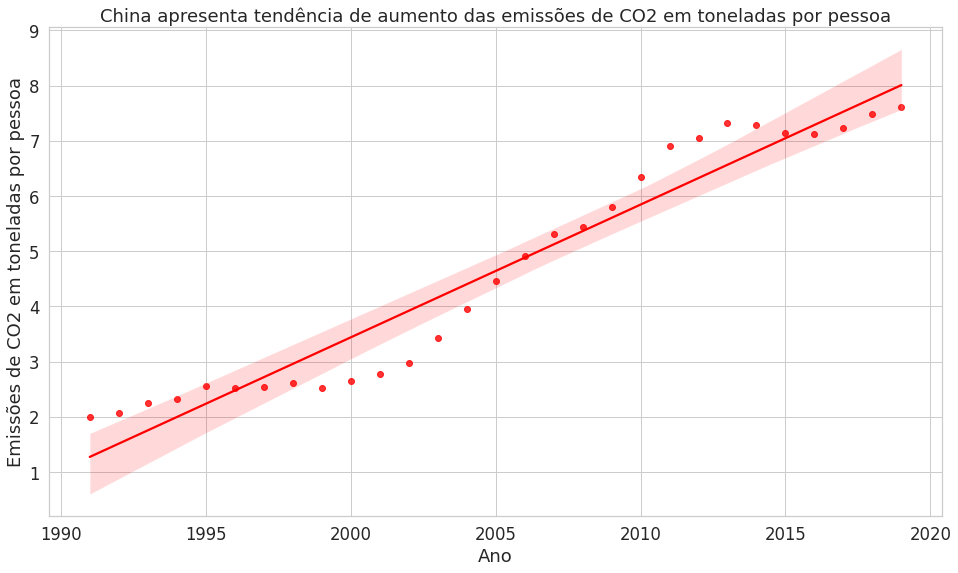

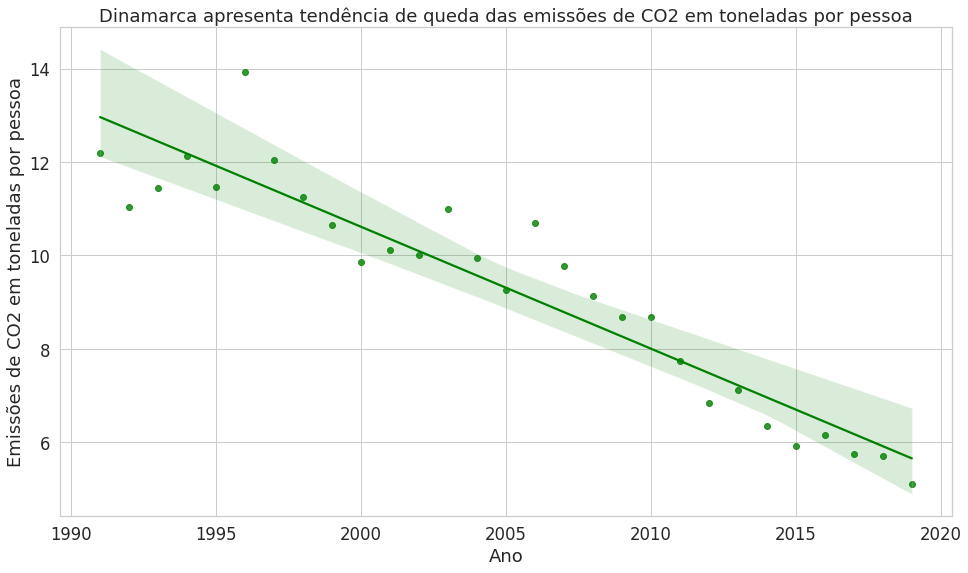

In [8]:
sns.set(rc={'figure.figsize':(16, 9)}, font_scale = 1.5, style='whitegrid')
sns.regplot(data=df_brasil.astype(float), x=df_brasil.index.astype(float), y='Emissões de CO2 em toneladas por pessoa', color='blue', ci=99.9)
plt.title('Brasil apresenta tendência de aumento das emissões de CO2 em toneladas por pessoa')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 em toneladas por pessoa')
plt.xticks(rotation=0)
plt.show()

sns.set(rc={'figure.figsize':(16, 9)}, font_scale = 1.5, style='whitegrid')
sns.regplot(data=df_china.astype(float), x=df_china.index.astype(float), y='Emissões de CO2 em toneladas por pessoa', color='red', ci=99.9)
plt.title('China apresenta tendência de aumento das emissões de CO2 em toneladas por pessoa')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 em toneladas por pessoa')
plt.xticks(rotation=0)
plt.show()

sns.set(rc={'figure.figsize':(16, 9)}, font_scale = 1.5, style='whitegrid')
sns.regplot(data=df_dinamarca.astype(float), x=df_dinamarca.index.astype(float), y='Emissões de CO2 em toneladas por pessoa', color='green', ci=99.9)
plt.title('Dinamarca apresenta tendência de queda das emissões de CO2 em toneladas por pessoa')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 em toneladas por pessoa')
plt.xticks(rotation=0)
plt.show()

<h1>Referências Bibliográficas</h1>

https://mundoeducacao.uol.com.br/amp/biologia/ciclo-carbono.htm

https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide

https://www.dailymail.co.uk/sciencetech/article-9955699/Global-warming-actually-causing-colder-winters-making-polar-vortex-stretch-south-US.html

https://www.iea.org/news/global-co2-emissions-rebounded-to-their-highest-level-in-history-in-2021

https://data.worldbank.org/indicator/EN.ATM.CO2E.PC?most_recent_year_desc=true

Alunos: Felipe Maluli, Lucca Hiratsuca, Thomas Chiari